In [286]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data
mousedf = pd.read_csv(mouse_drug_data_to_load)
clinicaldf = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
# Display the data table for preview

In [287]:
mousedf.describe()

,Mouse ID,Drug
count,250,250
unique,249,10
top,g989,Zoniferol
freq,2,25


In [288]:
clinicaldf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [289]:
merged_df = pd.merge(clinicaldf,mousedf, on = 'Mouse ID',how='left')
#more data is present on clinicdf. 

In [290]:
merged_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


# Tumor Response to Treatment

In [291]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_grouped_df = merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
#mean_tumor_df = tumor_grouped_df.mean()
# Convert to DataFrame
#meantumordf = meantumordf.drop(columns=["Metastatic Sites"])
#meantumordf = meantumordf.reset_index()
# Preview DataFrame
#meantumordf.head(10)

In [292]:
mean_tumor_df = tumor_grouped_df.mean()

In [293]:
#mean_tumor_df

In [294]:
mean_tumor_df = mean_tumor_df.reset_index()\

In [295]:
type(mean_tumor_df)

pandas.core.frame.DataFrame

In [296]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_df = tumor_grouped_df.sem()
# Convert to DataFrame
# Preview DataFrame
#use sem function
#same as mean

In [297]:
sem_tumor_df = sem_tumor_df.reset_index()

In [298]:
sem_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [299]:
sem_tumor_pivot_df = sem_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
sem_tumor_pivot_df

reduced_sem_tumor_pivot_df = sem_tumor_pivot_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'],axis=1)
reduced_sem_tumor_pivot_df
#sem_tumor_df.reset_index(inplace=True)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [300]:
sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [301]:
mean_tumor_pivot_df = mean_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
mean_tumor_pivot_df

reduced_mean_tumor_pivot_df = mean_tumor_pivot_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'],axis=1)
reduced_mean_tumor_pivot_df              



Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [302]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
#meantumordf.head()


In [303]:
#meantumordfpivot = meantumordf.pivot(index='Timepoint',columns='Drug',values=mainDrug) 

In [304]:
#

In [305]:
#reduced_mean_tumor = meantumordfpivot
#reduced_mean_tumor['Timepoint']
#reduced_mean_tumor.iloc[:, 2:8]
#meantumordf4 = meantumordfpivot.drop(columns=['Ceftamin','Naftisol'],axis=1)

In [306]:
reduced_mean_tumor_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [307]:
#type(meantumordfpivot)
#meantumordfpivot.describe()
#meantumordfpivot.loc(meantumordfpivot(['Capomulin','Infubinol','Ketapril','Placebo']))

In [308]:
#meantumordf4 = meantumordfpivot['Capomulin']

In [309]:
#meantumordfpivot[['Ceftamin']]

In [310]:
mainDrug = ['Capomulin','Infubinol','Ketapril','Placebo']
x_axis = reduced_mean_tumor_pivot_df.index.values
#plt.plot(x_axis, reduced_mean_tumor_pivot_df['Capomulin'],marker='o',color='red',ls='--',linewidth=0.6)
#plt.plot(x_axis, reduced_mean_tumor_pivot_df['Infubinol'],marker='^',color='blue',ls='--',linewidth=0.6)
#plt.plot(x_axis, reduced_mean_tumor_pivot_df['Ketapril'],marker='s',color='green',ls='--',linewidth=0.6)
#plt.plot(x_axis, reduced_mean_tumor_pivot_df['Placebo'],marker='d',color='black',ls='--',linewidth=0.6)

#plt.title('Tumor Response to Treatment')
#plt.xlabel('Time (Days)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.legend(mainDrug, loc='best')
#plt.grid()
#plt.savefig(os.path.join('tumor_response_to_treatment.png'))
#plt.show()

In [311]:
sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [312]:
#stelist=[]
#for x in mainDrug:
##    ste = sem_tumor_df[x].sem()
#    print(ste)

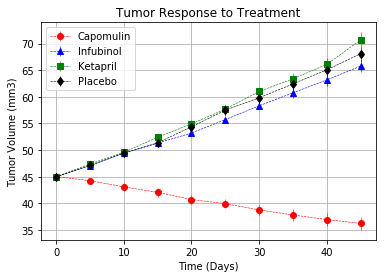

In [313]:
plt.errorbar(x_axis, reduced_mean_tumor_pivot_df['Capomulin'],reduced_sem_tumor_pivot_df['Capomulin'],marker='o',color='red',ls='--',linewidth=0.6)
plt.errorbar(x_axis, reduced_mean_tumor_pivot_df['Infubinol'],reduced_sem_tumor_pivot_df['Infubinol'],marker='^',color='blue',ls='--',linewidth=0.6)
plt.errorbar(x_axis, reduced_mean_tumor_pivot_df['Ketapril'],reduced_sem_tumor_pivot_df['Ketapril'],marker='s',color='green',ls='--',linewidth=0.6)
plt.errorbar(x_axis, reduced_mean_tumor_pivot_df['Placebo'],reduced_sem_tumor_pivot_df['Placebo'],marker='d',color='black',ls='--',linewidth=0.6)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(mainDrug, loc='best')
plt.grid()
plt.savefig(os.path.join('tumor_response_to_treatment_02.png'))
plt.show()




In [52]:
#meantumordfpivot.index.values

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [277]:
# Generate the Plot (with Error Bars)
#plt.errorbar(y_axis, semtumordf)
#plt.errorbar(y_axis, meantumordfpivot)
# Save the Figure

In [278]:
# Show the Figure

## Metastatic Response to Treatment

In [321]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response_df = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
# Convert to DataFrame
mean_meta_response_df = meta_response_df.mean()
# Preview DataFrame
mean_meta_response_df = mean_meta_response_df.reset_index()

In [323]:
mean_meta_response_df.head(7)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [328]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta_response_df = meta_response_df.sem()
# Convert to DataFrame
sem_meta_response_df = sem_meta_response_df.reset_index()
# Preview DataFrame
sem_meta_response_df.head(7)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [329]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_pivot_df = mean_meta_response_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
mean_meta_pivot_df

reduced_mean_meta_pivot_df = mean_meta_pivot_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'],axis=1)
reduced_mean_meta_pivot_df
# Preview that Reformatting worked


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [330]:
sem_meta_pivot_df = sem_meta_response_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
sem_meta_pivot_df

reduced_sem_meta_pivot_df = sem_meta_pivot_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'],axis=1)
reduced_sem_meta_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


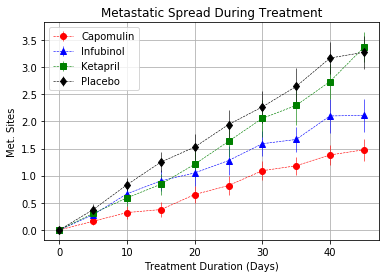

In [331]:
# Generate the Plot (with Error Bars)
plt.errorbar(x_axis, reduced_mean_meta_pivot_df['Capomulin'],reduced_sem_meta_pivot_df['Capomulin'],marker='o',color='red',ls='--',linewidth=0.6)
plt.errorbar(x_axis, reduced_mean_meta_pivot_df['Infubinol'],reduced_sem_meta_pivot_df['Infubinol'],marker='^',color='blue',ls='--',linewidth=0.6)
plt.errorbar(x_axis, reduced_mean_meta_pivot_df['Ketapril'],reduced_sem_meta_pivot_df['Ketapril'],marker='s',color='green',ls='--',linewidth=0.6)
plt.errorbar(x_axis, reduced_mean_meta_pivot_df['Placebo'],reduced_sem_meta_pivot_df['Placebo'],marker='d',color='black',ls='--',linewidth=0.6)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(mainDrug, loc='best')
plt.grid()
plt.savefig(os.path.join('meta_spread_during_treatment.png'))
plt.show()


# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [343]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate_mouse_df = pd.pivot_table(merged_df, index=["Timepoint"], values="Tumor Volume (mm3)", columns=["Drug"], aggfunc="count")
# Convert to DataFrame
#survival_rate_mouse_df = survival_rate_mouse_df.sum()
# Preview DataFrame
#survival_rate_mouse_df


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [344]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_mouse_df = survival_rate_mouse_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'],axis=1)

survival_rate_mouse_df
# Preview the Data Frame


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)
plt.plot(x_axis)
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)